In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df=pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Credit Card Fraud Detection Veri Seti Açıklaması
Bu veri seti, Avrupa'daki bir banka tarafından sağlanan kredi kartı işlemlerini içerir. Amaç, sahte işlemleri (fraud) tespit eden bir makine öğrenmesi modeli geliştirmektir.

📌 Veri Seti Detayları:

Zaman Damgası (Time) → İşlemin kaydedildiği zaman (saniye cinsinden).

Özellikler (V1 - V28) → PCA dönüşümü uygulanmış gizli değişkenlerdir. Bu yüzden doğrudan anlamlarını bilmiyoruz, ancak dolandırıcılık açısından önemli kalıplar içerirler.

İşlem Tutarı (Amount) → İşlemin parasal değeri (€ cinsinden).

Hedef Değişken (Class) →
0: Normal işlem
1: Dolandırıcılık (Fraud)

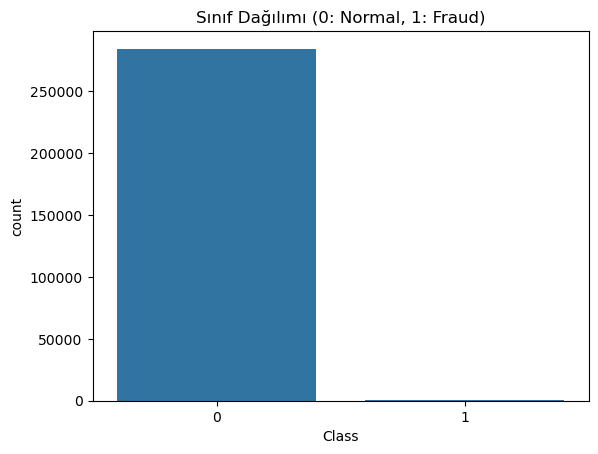

🔹 Normal İşlemler: %99.83
🔹 Fraud (Dolandırıcılık) İşlemleri: %0.17


In [7]:

sns.countplot(x=df["Class"])
plt.title("Sınıf Dağılımı (0: Normal, 1: Fraud)")
plt.show()


fraud_ratio = df["Class"].value_counts(normalize=True) * 100
print(f"🔹 Normal İşlemler: %{fraud_ratio[0]:.2f}")
print(f"🔹 Fraud (Dolandırıcılık) İşlemleri: %{fraud_ratio[1]:.2f}")


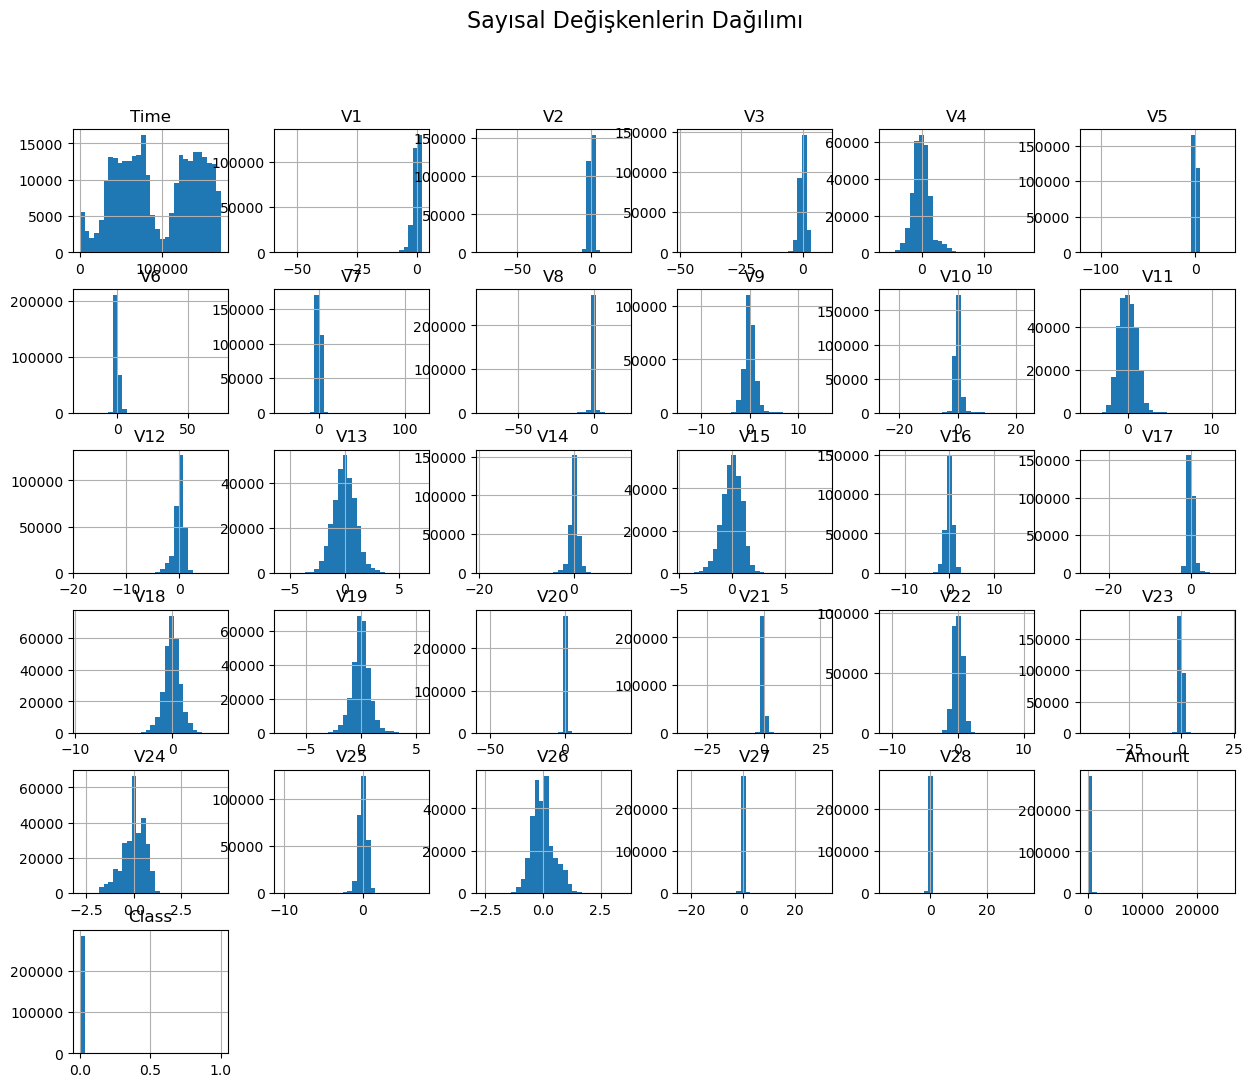

In [8]:

df.hist(figsize=(15, 12), bins=30)
plt.suptitle("Sayısal Değişkenlerin Dağılımı", fontsize=16)
plt.show()


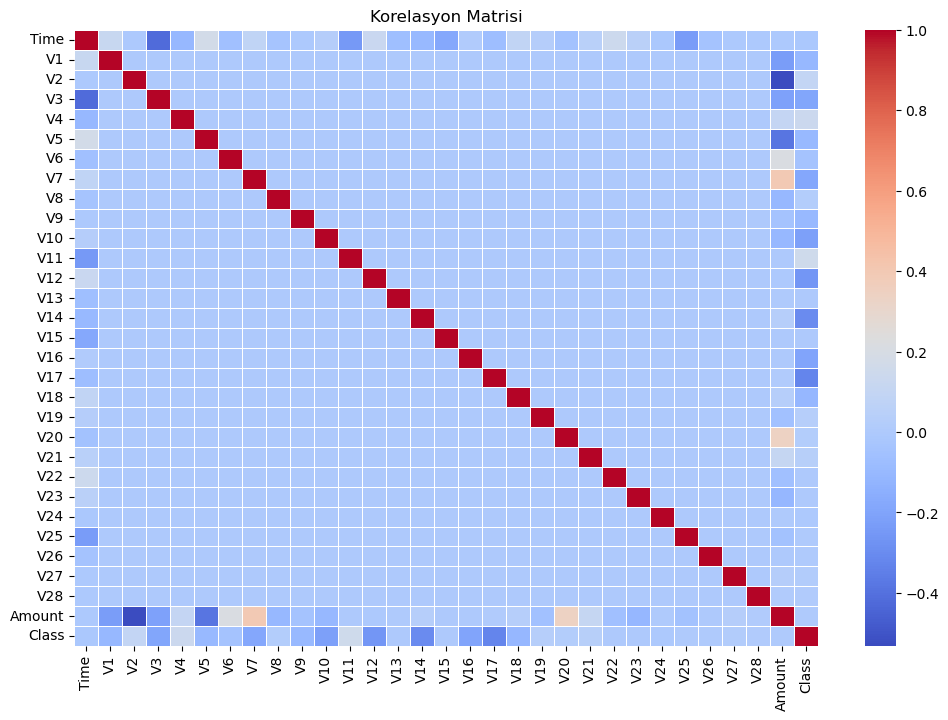

In [9]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()


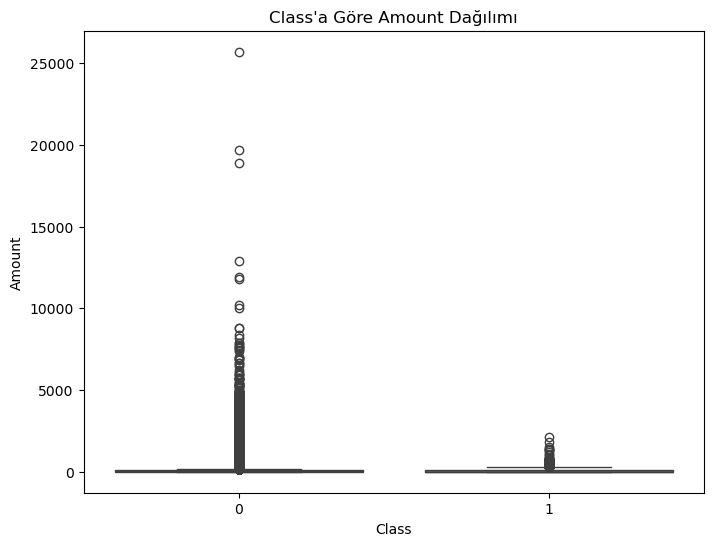

In [10]:

plt.figure(figsize=(8, 6))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Class'a Göre Amount Dağılımı")
plt.show()


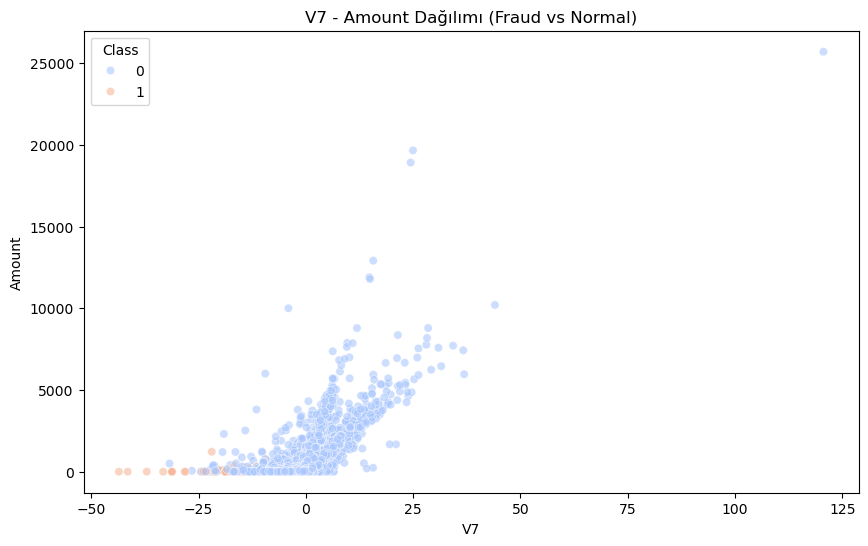

In [11]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="V7", y="Amount", hue="Class", alpha=0.6, palette="coolwarm")
plt.title("V7 - Amount Dağılımı (Fraud vs Normal)")
plt.show()


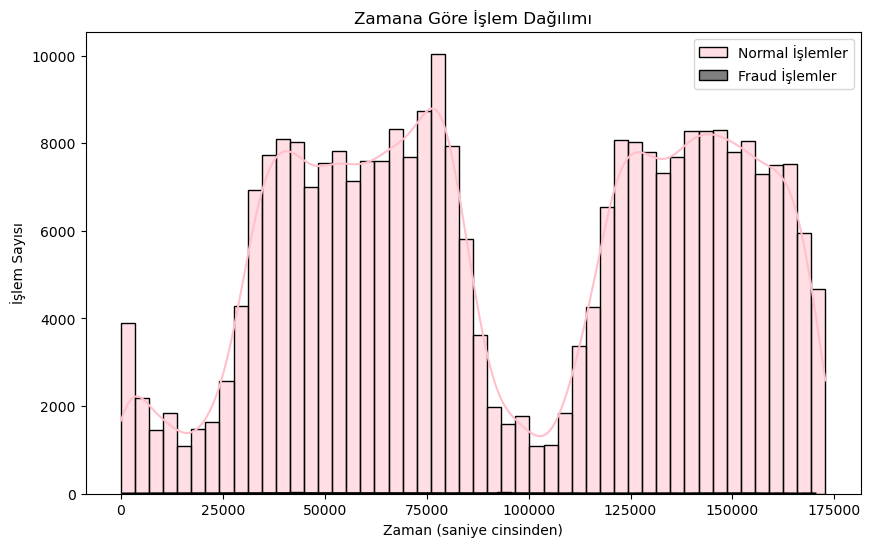

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df["Class"] == 0]["Time"], bins=50, color="pink", label="Normal İşlemler", kde=True)
sns.histplot(df[df["Class"] == 1]["Time"], bins=50, color="black", label="Fraud İşlemler", kde=True)
plt.title("Zamana Göre İşlem Dağılımı")
plt.xlabel("Zaman (saniye cinsinden)")
plt.ylabel("İşlem Sayısı")
plt.legend()
plt.show()


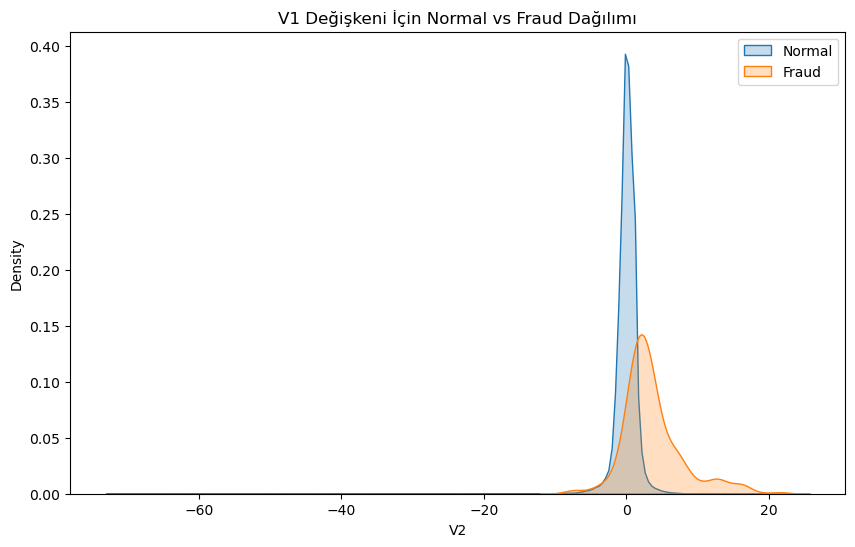

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Class"] == 0]["V2"], label="Normal", fill=True)
sns.kdeplot(df[df["Class"] == 1]["V2"], label="Fraud", fill=True)
plt.title("V1 Değişkeni İçin Normal vs Fraud Dağılımı")
plt.legend()
plt.show()


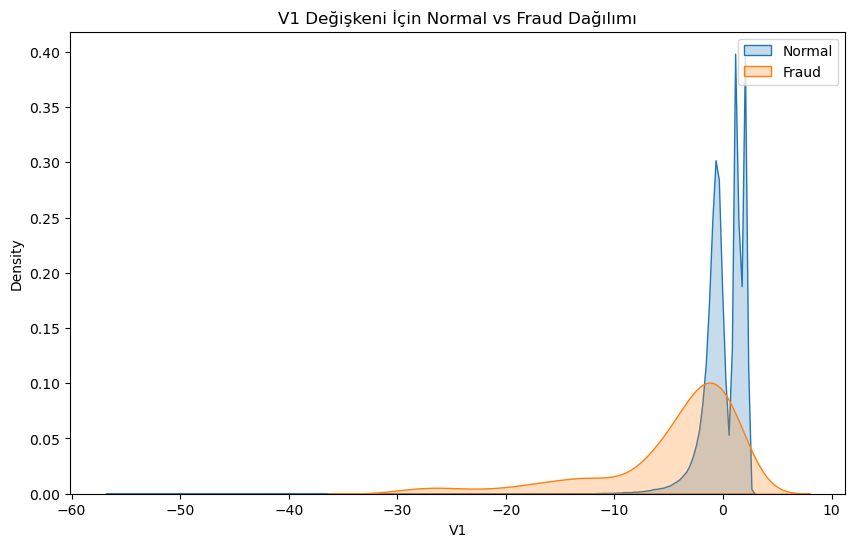

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Class"] == 0]["V1"], label="Normal", fill=True)
sns.kdeplot(df[df["Class"] == 1]["V1"], label="Fraud", fill=True)
plt.title("V1 Değişkeni İçin Normal vs Fraud Dağılımı")
plt.legend()
plt.show()


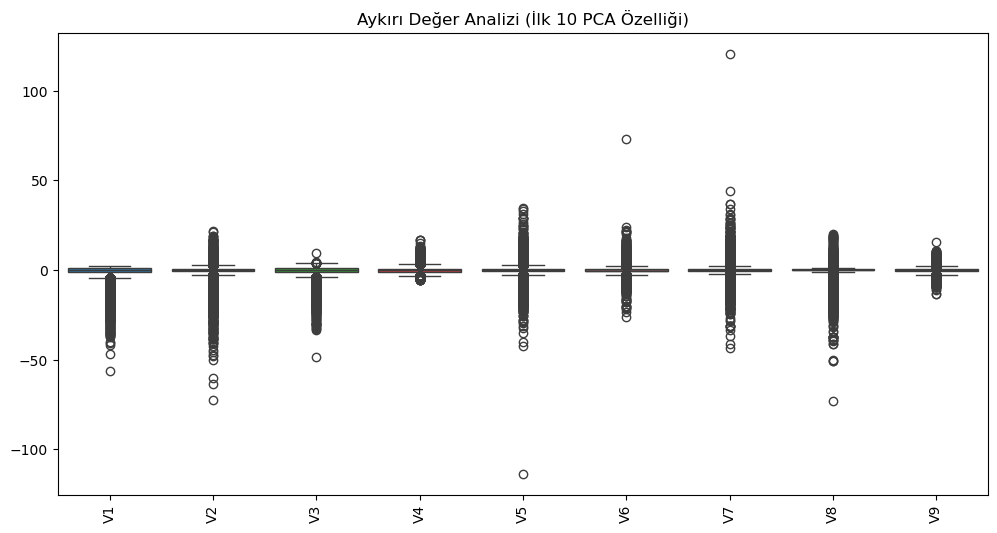

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:10])  # İlk birkaç değişkeni görselleştirelim
plt.title("Aykırı Değer Analizi (İlk 10 PCA Özelliği)")
plt.xticks(rotation=90)
plt.show()


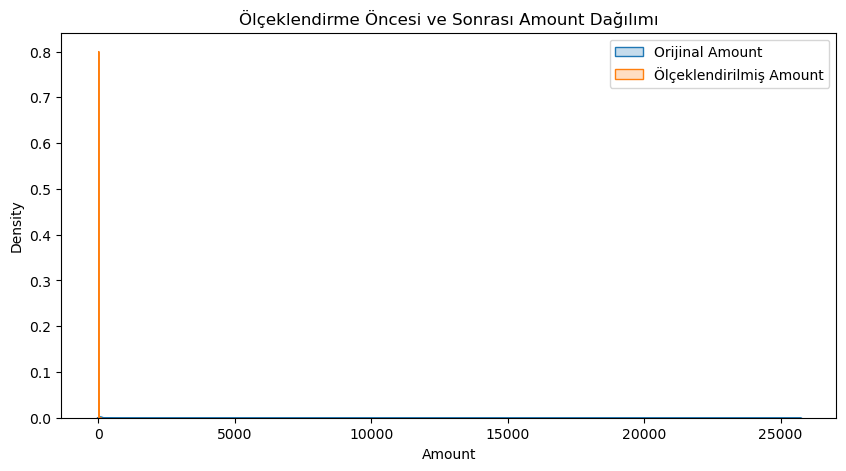

In [16]:

scaler = StandardScaler()
df["Amount_Scaled"] = scaler.fit_transform(df[["Amount"]])

# Eski ve yeni Amount değişkenini karşılaştıralım
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Amount"], label="Orijinal Amount", fill=True)
sns.kdeplot(df["Amount_Scaled"], label="Ölçeklendirilmiş Amount", fill=True)
plt.title("Ölçeklendirme Öncesi ve Sonrası Amount Dağılımı")
plt.legend()
plt.show()


In [17]:

X = df.drop("Class", axis=1)
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


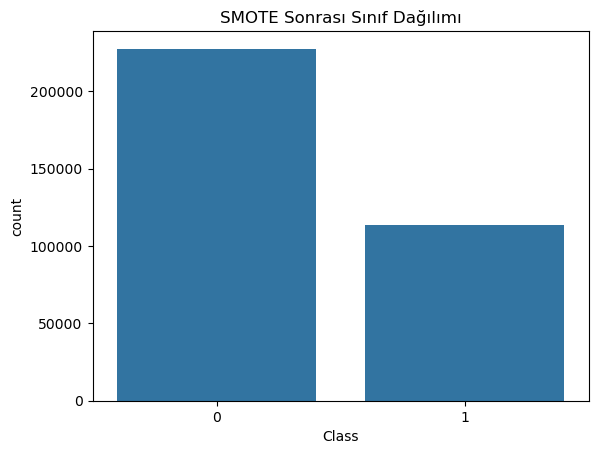

In [18]:

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



sns.countplot(x=y_train_smote)
plt.title("SMOTE Sonrası Sınıf Dağılımı")
plt.show()


In [21]:


# Random Forest Modeli (Overfitting önleyici ayarlar ile)
rf_model = RandomForestClassifier(
    class_weight="balanced",  # Dengeli sınıf ağırlıkları kullan
    n_estimators=50,          # 50 ağaç ile modeli eğit
    max_depth=10,             # Ağaçların maksimum derinliği 10
    min_samples_split=5,      # Minimum 5 örnek ile bölünme
    min_samples_leaf=5,       # Minimum 5 yaprak düğüm
    random_state=42
)

# Modeli eğit
rf_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5, n_estimators=50,
                       random_state=42)

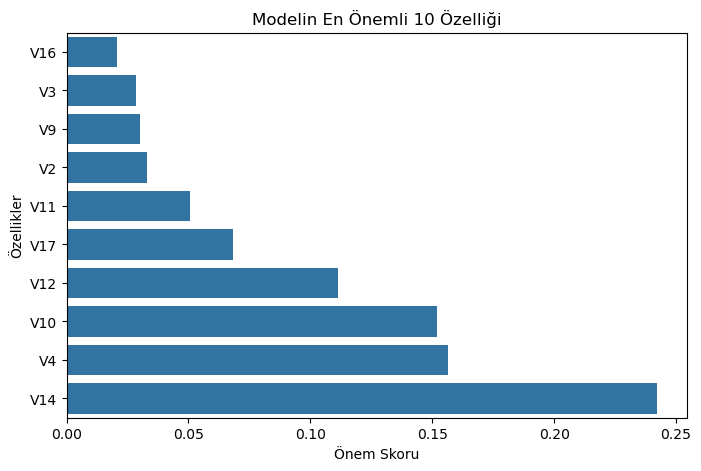

In [22]:


# Feature Importance hesapla
feature_importance = rf_model.feature_importances_
features = X_train.columns

# Önemli özellikleri sırala
sorted_idx = np.argsort(feature_importance)[-10:]

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Modelin En Önemli 10 Özelliği")
plt.show()


In [23]:
train_accuracy = rf_model.score(X_train_smote, y_train_smote)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.9958
Test Accuracy: 0.9983


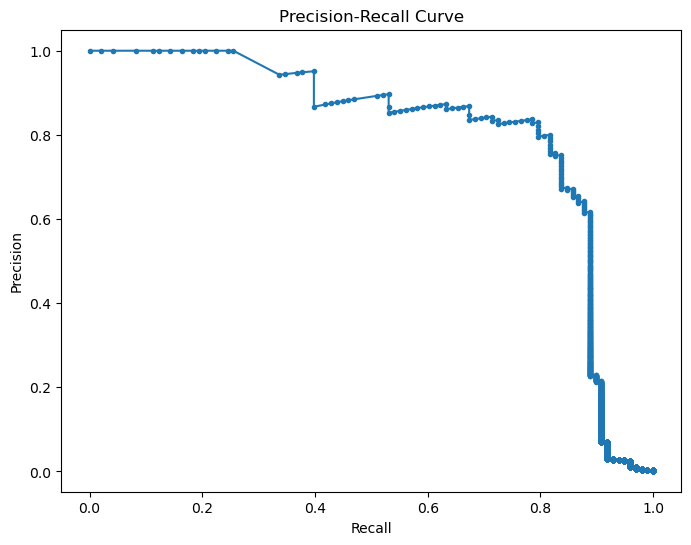

In [24]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [27]:
print(f"Model {rf_model.n_features_in_} özellik ile eğitildi.")
print(f"X_train_smote veri kümesinin sütun sayısı: {X_train_smote.shape[1]}")


Model 31 özellik ile eğitildi.
X_train_smote veri kümesinin sütun sayısı: 31


In [28]:
print(X_train_smote.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Amount_Scaled'],
      dtype='object')


In [32]:


# Modelin beklediği sütun isimlerini alalım
feature_names = X_train_smote.columns

# Örnek yeni veri (Bütün sütunları 0 ile dolduruyoruz, sadece belirli değerleri değiştiriyoruz)
new_data_dict = {col: 0 for col in feature_names}

# Yeni test verisini oluşturalım
new_data_dict.update({
    "V1": -1.5,
    "V2": 2.0,
    "V3": -3.0,
    "V4": 0.5,
    "V5": 1.2,
    "Amount": 500.0
})
new_data_1 = pd.DataFrame([new_data_dict])

new_data_dict.update({
    "V1": 3.2,
    "V2": -1.4,
    "V3": 4.5,
    "V4": -2.1,
    "V5": -3.3,
    "Amount": 25000.0
})
new_data_2 = pd.DataFrame([new_data_dict])

# İki yeni veriyi birleştirelim
new_data_final = pd.concat([new_data_1, new_data_2])

# Model ile tahmin yapalım
prediction = rf_model.predict(new_data_final)
print("Model Tahmini:", prediction)  # 0: Normal, 1: Fraud


Model Tahmini: [0 0]


In [33]:
# Olasılık değerlerini görelim
proba = rf_model.predict_proba(new_data_final)[:, 1]  # Fraud (1) olasılıklarını alalım
print("Fraud Olasılıkları:", proba)


Fraud Olasılıkları: [0.03804554 0.02544404]


In [34]:
threshold = 0.02  # %2'nin üzerindeki işlemleri fraud olarak işaretleyelim
y_pred_threshold = (proba >= threshold).astype(int)

print("Yeni Tahmin Sonuçları:", y_pred_threshold)


Yeni Tahmin Sonuçları: [1 1]


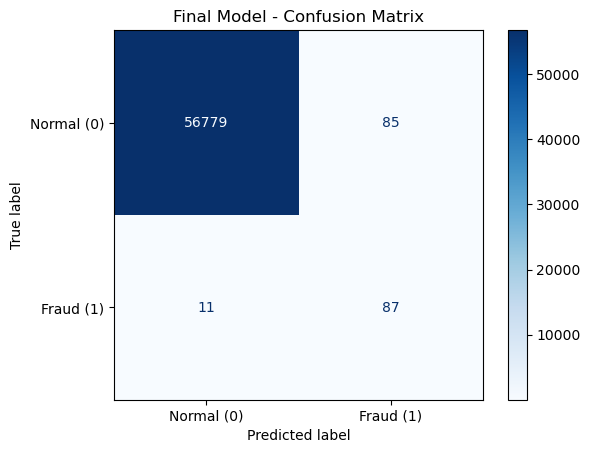

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix oluştur
cm = confusion_matrix(y_test, rf_model.predict(X_test))

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal (0)", "Fraud (1)"])
disp.plot(cmap='Blues')
plt.title("Final Model - Confusion Matrix")
plt.show()
